In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
%config InlineBackend.figure_format = "retina"
%matplotlib notebook

# Context

In [2]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<IPython.core.display.Javascript object>


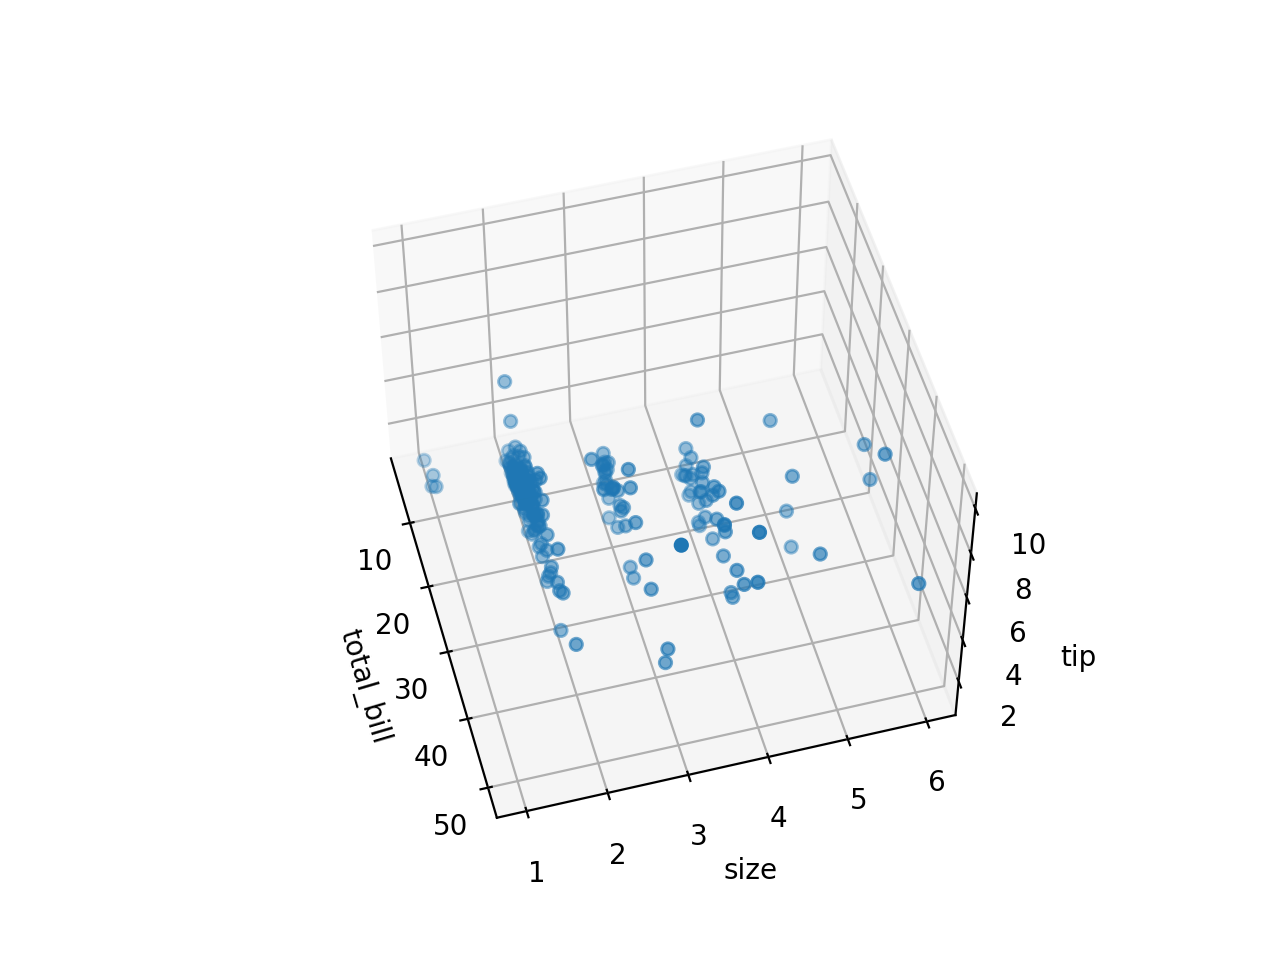

In [25]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter("total_bill", "size", "tip", data=df)
ax.set(xlabel="total_bill", ylabel="size", zlabel="tip");

In [4]:
w = LinearRegression(fit_intercept=False).fit(df[["total_bill", "size"]], df["tip"]).coef_

array([0.1007119 , 0.36209717])

<IPython.core.display.Javascript object>


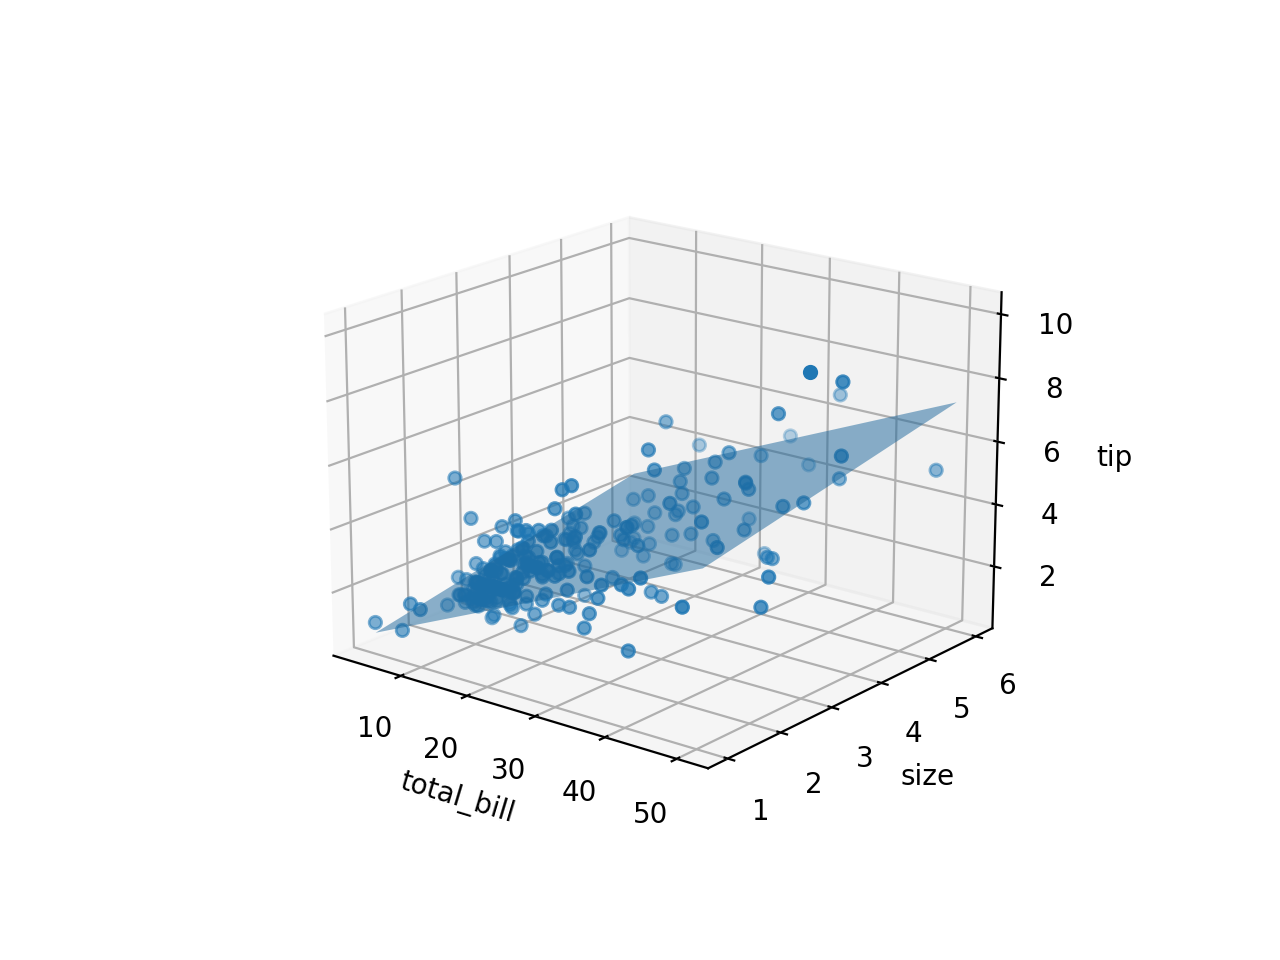

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter("total_bill", "size", "tip", data=df)
ax.set(xlabel="total_bill", ylabel="size", zlabel="tip")

xx, yy = np.meshgrid(df["total_bill"].agg(["min", "max"]), df["size"].agg(["min", "max"]))
zz = w[0] * xx + w[1] * yy
ax.plot_surface(xx, yy, zz, alpha=.5);

# How do we find the best fitting hyperplane?

<IPython.core.display.Javascript object>


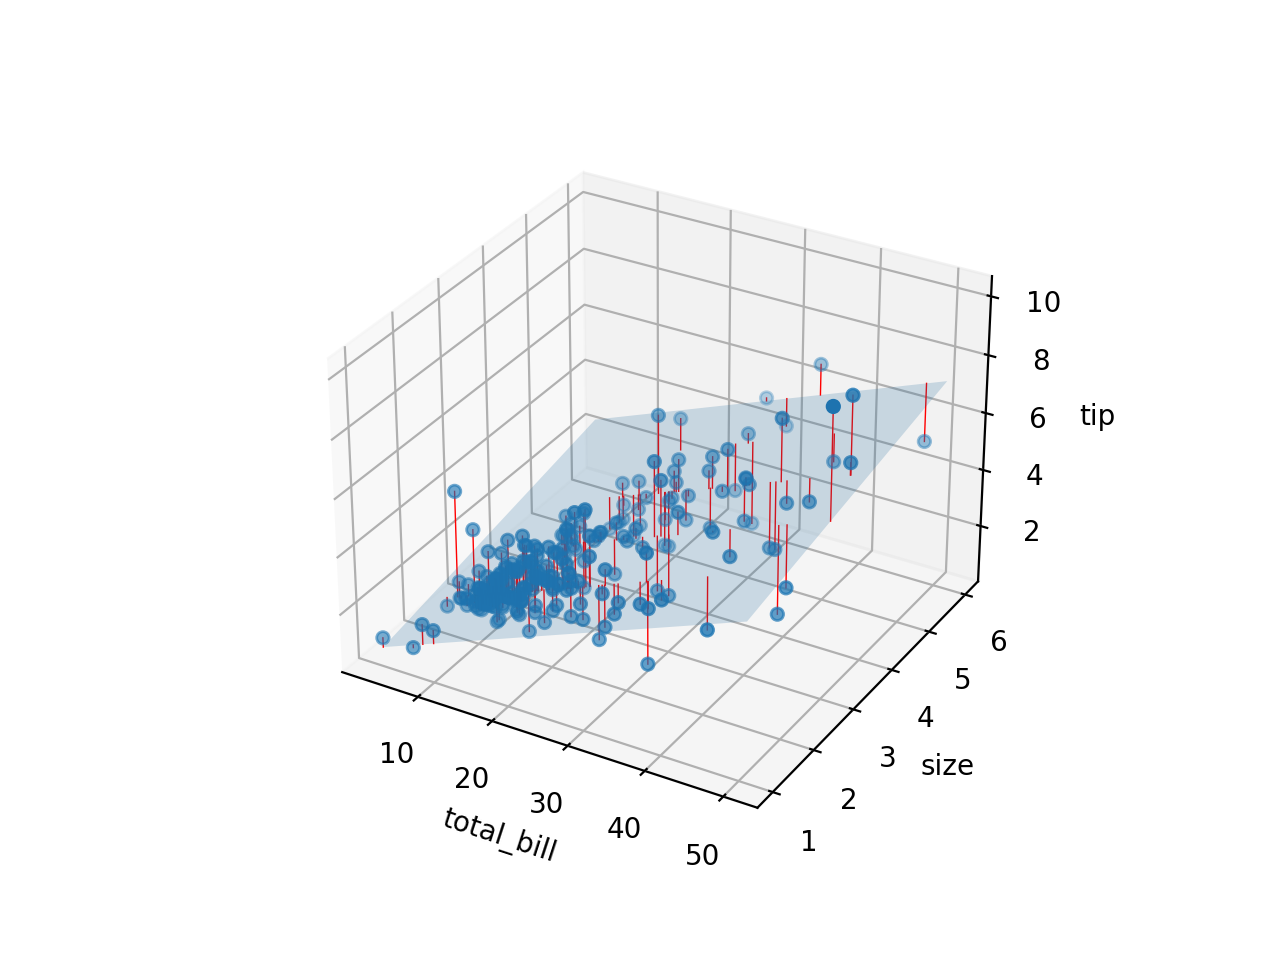

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter("total_bill", "size", "tip", data=df)
ax.set(xlabel="total_bill", ylabel="size", zlabel="tip")

xx, yy = np.meshgrid(df["total_bill"].agg(["min", "max"]), df["size"].agg(["min", "max"]))
zz = w[0] * xx + w[1] * yy
ax.plot_surface(xx, yy, zz, alpha=.2)

for x, y, z0, z1 in zip(df["total_bill"], df["size"], df["tip"], df[["total_bill", "size"]] @ w):
    ax.plot([x, x], [y, y], [z0, z1], c="r", lw=.5)